In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\\NBA Datasets\\GameLogs2024-25.csv', sep=';')
df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_PG_RANK,FGA_PG_RANK
0,2024-25,1629216,Gabe Vincent,Gabe,1610612747,LAL,Los Angeles Lakers,22400062,2024-10-22T00:00:00,LAL vs. MIN,...,3649,4478,6855,6717,4747,4982,4982,6145,5575,6354
1,2024-25,1642261,Dalton Knecht,Dalton,1610612747,LAL,Los Angeles Lakers,22400062,2024-10-22T00:00:00,LAL vs. MIN,...,2450,2840,5970,5899,3728,4359,4359,4699,4528,5340
2,2024-25,1628384,OG Anunoby,OG,1610612752,NYK,New York Knicks,22400061,2024-10-22T00:00:00,NYK @ BOS,...,6621,6493,6358,6358,6893,6618,6618,6307,5575,3748
3,2024-25,1629675,Naz Reid,Naz,1610612750,MIN,Minnesota Timberwolves,22400062,2024-10-22T00:00:00,MIN @ LAL,...,3649,3014,4084,4296,4389,5626,5626,4529,3577,3284
4,2024-25,1630540,Miles McBride,Miles,1610612752,NYK,New York Knicks,22400061,2024-10-22T00:00:00,NYK @ BOS,...,199,494,2277,2136,7540,7535,7535,2066,749,2455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,2024-25,1627741,Buddy Hield,Buddy,1610612744,GSW,Golden State Warriors,22401204,2024-12-11T00:00:00,GSW @ HOU,...,2450,2840,4578,4606,6221,7415,7415,3082,1523,1740
7848,2024-25,1628973,Jalen Brunson,Jalen,1610612752,NYK,New York Knicks,22401202,2024-12-11T00:00:00,NYK vs. ATL,...,5183,5409,2469,2567,4213,4845,4845,3899,2104,1015
7849,2024-25,1630552,Jalen Johnson,Jalen,1610612737,ATL,Atlanta Hawks,22401202,2024-12-11T00:00:00,ATL @ NYK,...,5013,5073,2115,1968,4528,4712,4712,1469,749,315
7850,2024-25,1630228,Jonathan Kuminga,Jonathan,1610612744,GSW,Golden State Warriors,22401204,2024-12-11T00:00:00,GSW @ HOU,...,4723,5294,965,859,6148,7509,7509,5143,749,315


In [3]:
df.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       ...
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'E_USG_PCT_RANK',
       'E_PACE_RANK', 'PACE_RANK', 'sp_work_PACE_RANK', 'PIE_RANK',
       'FGM_PG_RANK', 'FGA_PG_RANK'],
      dtype='object', length=125)

In [4]:
df.isna().sum()

SEASON_YEAR          0
PLAYER_ID            0
PLAYER_NAME          0
NICKNAME             0
TEAM_ID              0
                    ..
PACE_RANK            0
sp_work_PACE_RANK    0
PIE_RANK             0
FGM_PG_RANK          0
FGA_PG_RANK          0
Length: 125, dtype: int64

In [5]:
df = df.drop(columns=[col for col in df.columns if ('_' in col) and col != 'PLAYER_NAME'])
df

,PLAYER_NAME,NICKNAME,MATCHUP,WL,MIN,FGM,FGA,FG3M,FG3A,FTM,...,BLK,BLKA,PF,PFD,PTS,DD2,TD3,PACE,PIE,POSS
0,Gabe Vincent,Gabe,LAL vs. MIN,W,17.216667,1,2,0,0,0,...,0,0,1,0,2,0,0,98.97,0.027,37
1,Dalton Knecht,Dalton,LAL vs. MIN,W,15.783333,2,4,1,3,0,...,0,0,1,0,5,0,0,100.36,0.070,34
2,OG Anunoby,OG,NYK @ BOS,L,34.166667,1,7,0,4,2,...,0,0,3,1,4,0,0,94.83,0.021,69
3,Naz Reid,Naz,MIN @ LAL,L,26.350000,3,8,2,4,4,...,0,0,3,2,12,0,0,97.46,0.074,53
4,Miles McBride,Miles,NYK @ BOS,L,25.850000,8,10,4,5,2,...,0,0,1,3,22,0,0,90.06,0.137,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,Buddy Hield,Buddy,GSW @ HOU,L,35.041667,6,12,3,9,0,...,3,0,3,0,15,0,0,91.09,0.109,68
7848,Jalen Brunson,Jalen,NYK vs. ATL,L,35.516667,5,15,2,6,2,...,1,2,0,2,14,0,0,99.33,0.090,73
7849,Jalen Johnson,Jalen,ATL @ NYK,W,41.183333,8,20,1,5,4,...,2,3,1,4,21,1,0,99.65,0.157,87
7850,Jonathan Kuminga,Jonathan,GSW @ HOU,L,36.166667,8,20,2,6,2,...,1,2,2,4,20,0,0,90.25,0.059,68


In [6]:
df_totals = df.groupby(by='PLAYER_NAME').sum(numeric_only=True).reset_index()
df_totals

,PLAYER_NAME,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,...,BLK,BLKA,PF,PFD,PTS,DD2,TD3,PACE,PIE,POSS
0,AJ Green,487.600000,62,130,56,118,5,6,4,46,...,2,0,45,12,185,0,0,2290.99,1.617,1003
1,AJ Johnson,10.700000,3,6,1,1,0,0,0,2,...,0,1,0,0,7,0,0,599.12,7.903,28
2,Aaron Gordon,326.298333,54,102,16,34,33,42,21,45,...,3,7,17,35,157,2,0,1158.04,1.149,701
3,Aaron Holiday,145.165000,21,45,15,34,7,9,0,15,...,1,0,7,9,64,0,0,1642.51,2.082,321
4,Aaron Nesmith,136.221667,19,36,6,11,11,13,4,20,...,2,3,24,12,55,0,0,596.96,0.443,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Zach Edey,281.266667,64,105,6,10,22,33,43,54,...,14,9,44,31,156,2,0,1459.93,1.607,608
498,Zach LaVine,733.255000,177,350,73,169,60,75,5,92,...,6,12,40,61,487,1,0,2302.74,2.448,1596
499,Zeke Nnaji,73.686667,9,22,0,8,1,5,2,5,...,2,3,6,8,19,0,0,1568.23,1.194,162
500,Ziaire Williams,458.620000,64,159,18,66,35,44,22,70,...,7,18,56,42,181,1,0,2042.90,1.201,925


In [7]:
df_mean = df.groupby(by='PLAYER_NAME').mean(numeric_only=True).reset_index()
df_mean

,PLAYER_NAME,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,...,BLK,BLKA,PF,PFD,PTS,DD2,TD3,PACE,PIE,POSS
0,AJ Green,21.200000,2.695652,5.652174,2.434783,5.130435,0.217391,0.260870,0.173913,2.000000,...,0.086957,0.000000,1.956522,0.521739,8.043478,0.000000,0.0,99.608261,0.070304,43.608696
1,AJ Johnson,2.140000,0.600000,1.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.400000,...,0.000000,0.200000,0.000000,0.000000,1.400000,0.000000,0.0,119.824000,1.580600,5.600000
2,Aaron Gordon,29.663485,4.909091,9.272727,1.454545,3.090909,3.000000,3.818182,1.909091,4.090909,...,0.272727,0.636364,1.545455,3.181818,14.272727,0.181818,0.0,105.276364,0.104455,63.727273
3,Aaron Holiday,9.677667,1.400000,3.000000,1.000000,2.266667,0.466667,0.600000,0.000000,1.000000,...,0.066667,0.000000,0.466667,0.600000,4.266667,0.000000,0.0,109.500667,0.138800,21.400000
4,Aaron Nesmith,22.703611,3.166667,6.000000,1.000000,1.833333,1.833333,2.166667,0.666667,3.333333,...,0.333333,0.500000,4.000000,2.000000,9.166667,0.000000,0.0,99.493333,0.073833,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Zach Edey,20.090476,4.571429,7.500000,0.428571,0.714286,1.571429,2.357143,3.071429,3.857143,...,1.000000,0.642857,3.142857,2.214286,11.142857,0.142857,0.0,104.280714,0.114786,43.428571
498,Zach LaVine,33.329773,8.045455,15.909091,3.318182,7.681818,2.727273,3.409091,0.227273,4.181818,...,0.272727,0.545455,1.818182,2.772727,22.136364,0.045455,0.0,104.670000,0.111273,72.545455
499,Zeke Nnaji,4.912444,0.600000,1.466667,0.000000,0.533333,0.066667,0.333333,0.133333,0.333333,...,0.133333,0.200000,0.400000,0.533333,1.266667,0.000000,0.0,104.548667,0.079600,10.800000
500,Ziaire Williams,21.839048,3.047619,7.571429,0.857143,3.142857,1.666667,2.095238,1.047619,3.333333,...,0.333333,0.857143,2.666667,2.000000,8.619048,0.047619,0.0,97.280952,0.057190,44.047619


In [8]:
df_mean.to_csv('..\\NBA Datasets\\2024-25 Players Mean.csv', sep=';', index=False)
df_totals.to_csv('..\\NBA Datasets\\2024-25 Players Totals.csv', sep=';', index=False)

               PLAYER_NAME  PTS
0  Shai Gilgeous-Alexander  725
1    Giannis Antetokounmpo  720
2             De'Aaron Fox  660
3             Jayson Tatum  648
4            Anthony Davis  632
5            Jalen Brunson  618
6             Nikola Jokić  613
7             Franz Wagner  610
8          Anthony Edwards  607
9             Devin Booker  573


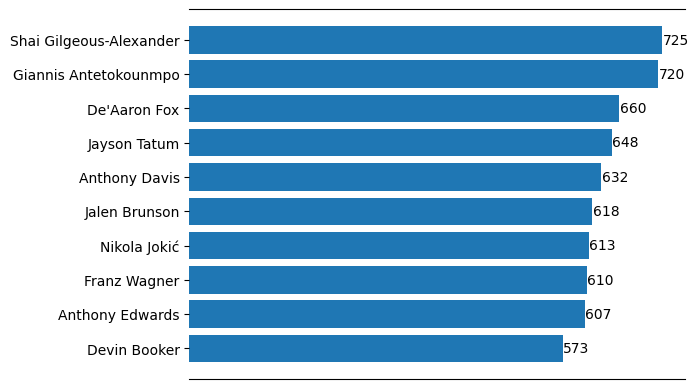


             PLAYER_NAME  REB
0     Karl-Anthony Towns  312
1            Ivica Zubac  304
2       Domantas Sabonis  293
3           Jakob Poeltl  278
4         Alperen Sengun  265
5          Jarrett Allen  259
6          Anthony Davis  258
7           Nikola Jokić  258
8            Rudy Gobert  253
9  Giannis Antetokounmpo  250


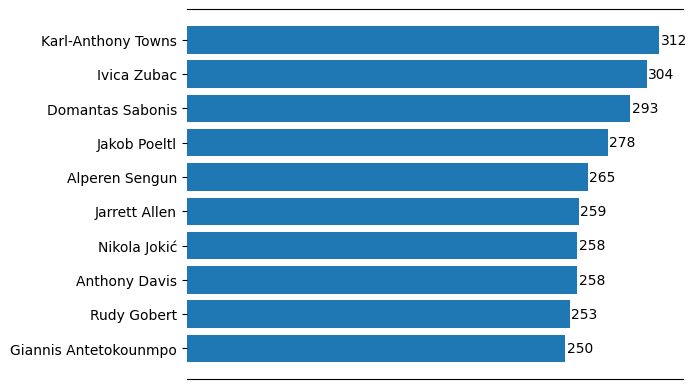


         PLAYER_NAME  AST
0         Trae Young  304
1  Tyrese Haliburton  210
2       LeBron James  210
3       James Harden  205
4         Chris Paul  205
5    Cade Cunningham  197
6      Jalen Brunson  195
7       Nikola Jokić  193
8        Josh Giddey  172
9     Damian Lillard  159


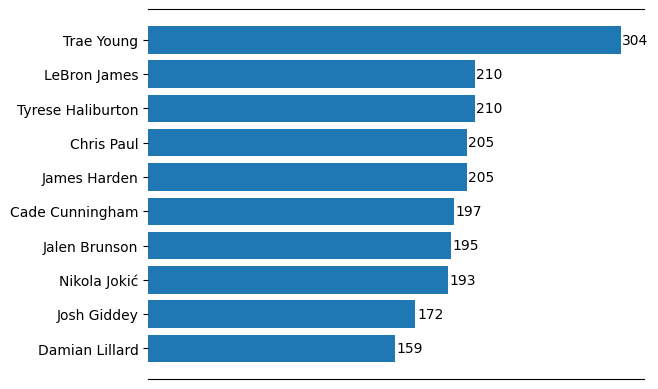


                PLAYER_NAME  STL
0             Dyson Daniels   73
1            Jalen Williams   49
2                Tari Eason   46
3  Kentavious Caldwell-Pope   43
4             Cason Wallace   43
5              Franz Wagner   43
6              De'Aaron Fox   43
7   Shai Gilgeous-Alexander   42
8                 Kris Dunn   41
9               Jalen Suggs   41


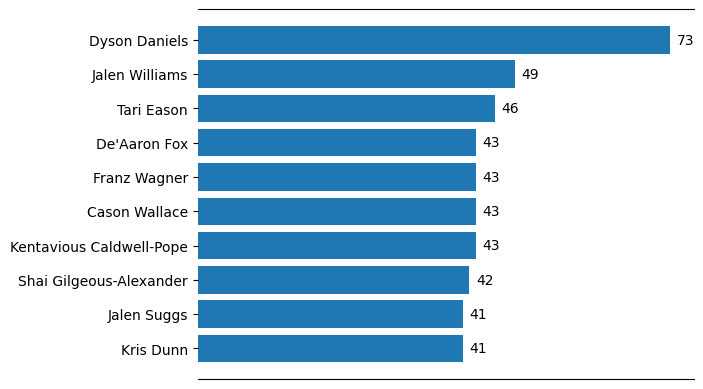


         PLAYER_NAME  BLK
0  Victor Wembanyama   64
1     Walker Kessler   51
2        Brook Lopez   51
3       Myles Turner   47
4      Anthony Davis   46
5  Jaren Jackson Jr.   44
6    Donovan Clingan   37
7     Alexandre Sarr   37
8        Evan Mobley   37
9        Rudy Gobert   34


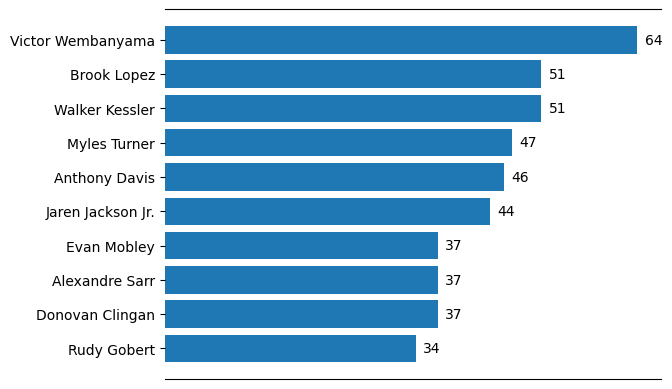


             PLAYER_NAME  TOV
0             Trae Young  114
1           James Harden  105
2        Cade Cunningham   98
3           LeBron James   94
4           De'Aaron Fox   86
5            LaMelo Ball   81
6          Jalen Johnson   80
7  Giannis Antetokounmpo   76
8             Jaden Ivey   75
9       Domantas Sabonis   75


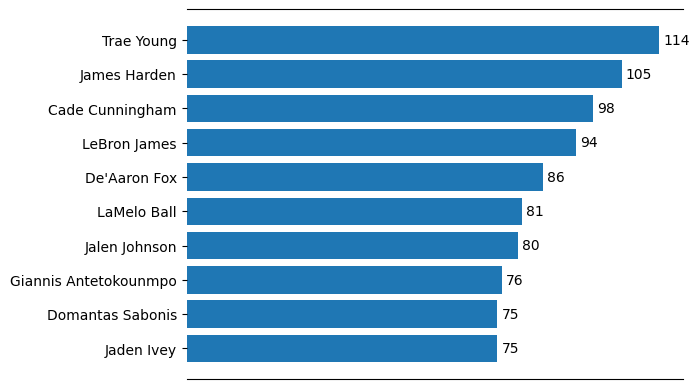


               PLAYER_NAME  FGM
0    Giannis Antetokounmpo  284
1  Shai Gilgeous-Alexander  255
2             De'Aaron Fox  245
3             Nikola Jokić  233
4            Anthony Davis  227
5             Franz Wagner  220
6            Jalen Brunson  211
7          Anthony Edwards  211
8             Jayson Tatum  210
9           Nikola Vučević  209


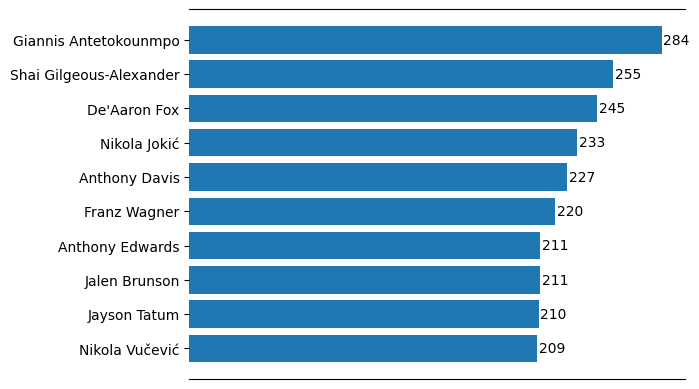


        PLAYER_NAME  FG3M
0   Anthony Edwards   103
1       Tyler Herro    92
2     Malik Beasley    92
3  Donovan Mitchell    90
4  Payton Pritchard    89
5      Jayson Tatum    88
6       LaMelo Ball    84
7     Derrick White    82
8    Brandon Miller    80
9       Buddy Hield    78


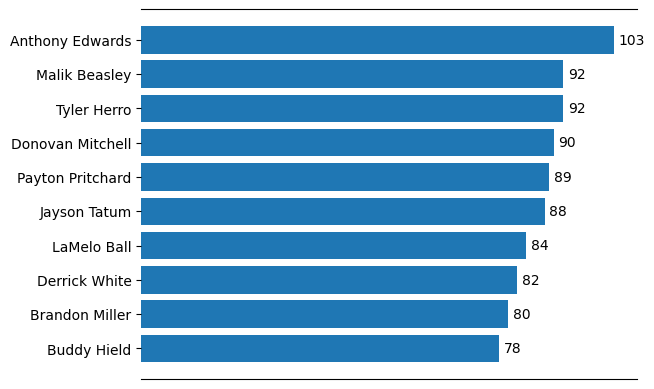


         PLAYER_NAME         MIN
0      Mikal Bridges  958.075000
1       De'Aaron Fox  930.456667
2          Josh Hart  923.748333
3         OG Anunoby  920.291667
4      Keegan Murray  910.353333
5         Trae Young  899.488333
6  Tyrese Haliburton  883.885000
7      Jalen Johnson  876.978333
8      Pascal Siakam  860.550000
9      Jalen Brunson  857.201667


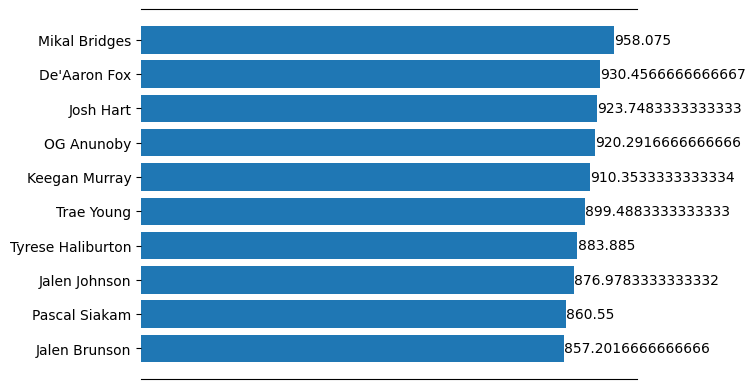

In [31]:
for stat in ['PTS','REB','AST','STL','BLK','TOV','FGM','FG3M','MIN']:
    df_filtered = df_totals.sort_values(stat, ascending=False).head(10).reset_index(drop=True).loc[:,['PLAYER_NAME', stat]]
    print(df_filtered)
    df_filtered = df_filtered.sort_values(stat, ascending=True)
    plt.barh(df_filtered['PLAYER_NAME'], df_filtered[stat], label=df_filtered[stat].values)
    for i, value in enumerate(df_filtered[stat]):
        plt.text(value + 1, i, str(value), va='center', ha='left')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.show()
    print('')